In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med =16; small =12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 2.1.2
print(sns.__version__)  #> 0.8.1

2.2.2
0.8.1


In [3]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import numpy as np

# 폰트 위치 지정
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

In [5]:
import os
import time
import sys

os.getcwd()

'C:\\Users\\ktm\\python_exe'

In [7]:
#os.chdir() # 작업 디렉토리 변경

In [9]:
time.time()

1544665952.4272778

In [10]:
start = time.time()
print(start)

1544666082.942001


In [11]:
end =time.time()
print(end)
cost_time=end-start
print(cost_time)

1544666083.5266407
0.5846395492553711


In [ ]:
now = time.gmtime(time.time()) # 현재 시각 측정 후 해석
print(now.tm_year, now.tm_mon, now.tm_mday) 

In [16]:
tr = pd.read_csv('E:/Bigdata/dataset/titanic/train_modified.csv', index_col='PassengerId')

In [17]:
tr.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
tr.shape

(891, 11)

In [19]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [20]:
# hue : Survived 기준으로 쪼개어서 이를 시각화 해 준다.(범주형)

In [21]:
tr.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

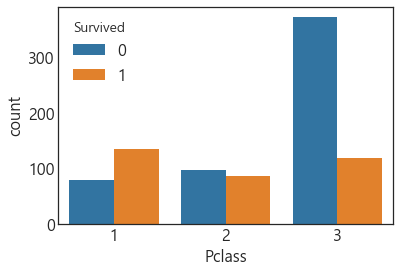

In [22]:
sns.countplot(data=tr, x='Pclass', hue='Survived')

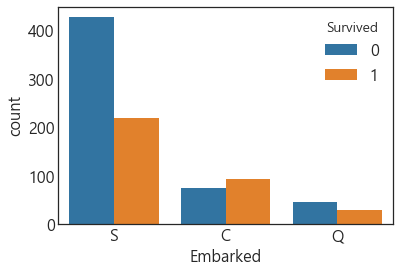

In [23]:
sns.countplot(data=tr, x='Embarked', hue='Survived')

### barplot
y를 지정할 때는 정수이어야 한다.

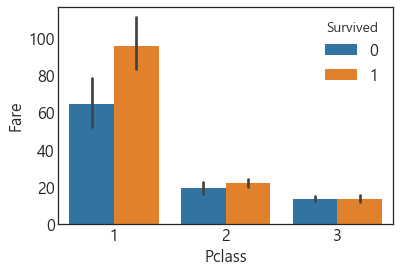

In [24]:
sns.barplot(data=tr, x='Pclass', y='Fare', hue='Survived')

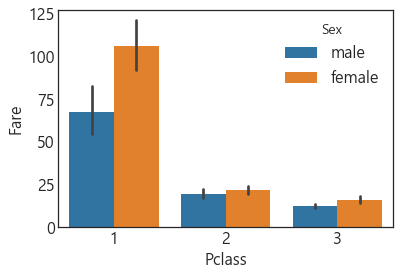

In [25]:
sns.barplot(data=tr, x='Pclass', y='Fare', hue='Sex')

In [26]:
tr_male = tr[tr['Sex']=='male']
tr_female = tr[tr['Sex']=='female']
print(tr_male.shape, tr_female.shape)

(577, 11) (314, 11)


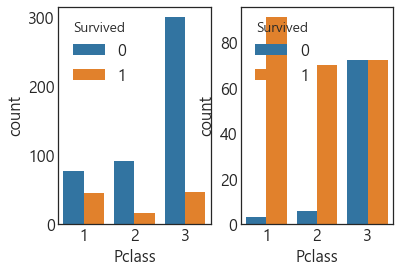

In [27]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.countplot(data=tr_male, x='Pclass', hue='Survived', ax=ax1)
sns.countplot(data=tr_female, x='Pclass', hue='Survived', ax=ax2)

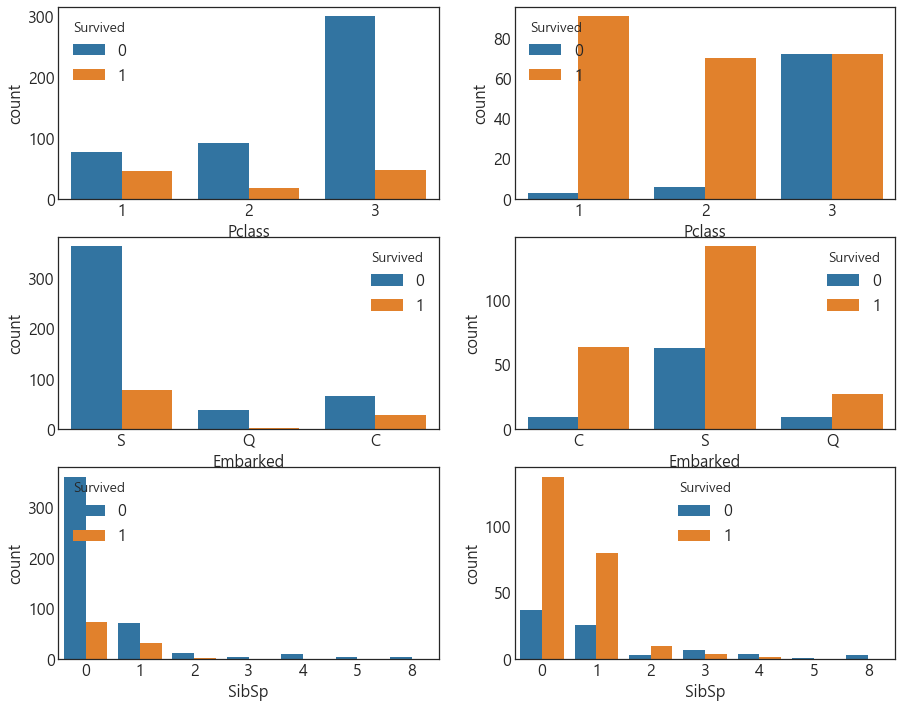

In [28]:
fig=plt.figure(figsize=(15,12))
sel = ['Pclass', 'Embarked', 'SibSp']
cnt=1
for i in range(3):
    cnt = (i+1)*2
    tmp1 = fig.add_subplot(3,2,cnt-1)
    tmp2 = fig.add_subplot(3,2,cnt)
    sns.countplot(data=tr_male, x=sel[i], hue='Survived', ax=tmp1)
    sns.countplot(data=tr_female, x=sel[i], hue='Survived', ax=tmp2)

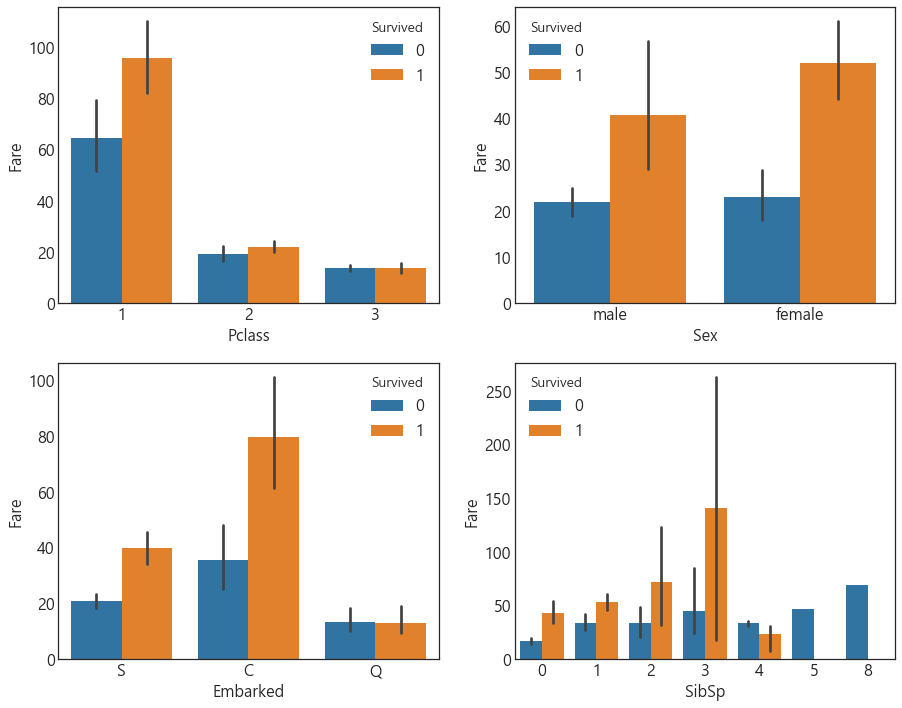

In [31]:
fig=plt.figure(figsize=(15,12))
sel= ['Pclass', 'Sex', 'Embarked', 'SibSp']
for i in range(4):
    tmp1 = fig.add_subplot(2,2, i+1)
    sns.barplot(data=tr, x=sel[i], y='Fare', hue='Survived', ax=tmp1)

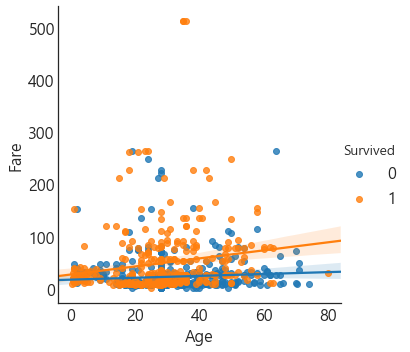

In [32]:
## 나이와 요금에 대해서 시각화
sns.lmplot(data=tr, x='Age', y='Fare', hue='Survived')

C:\Users\ktm\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


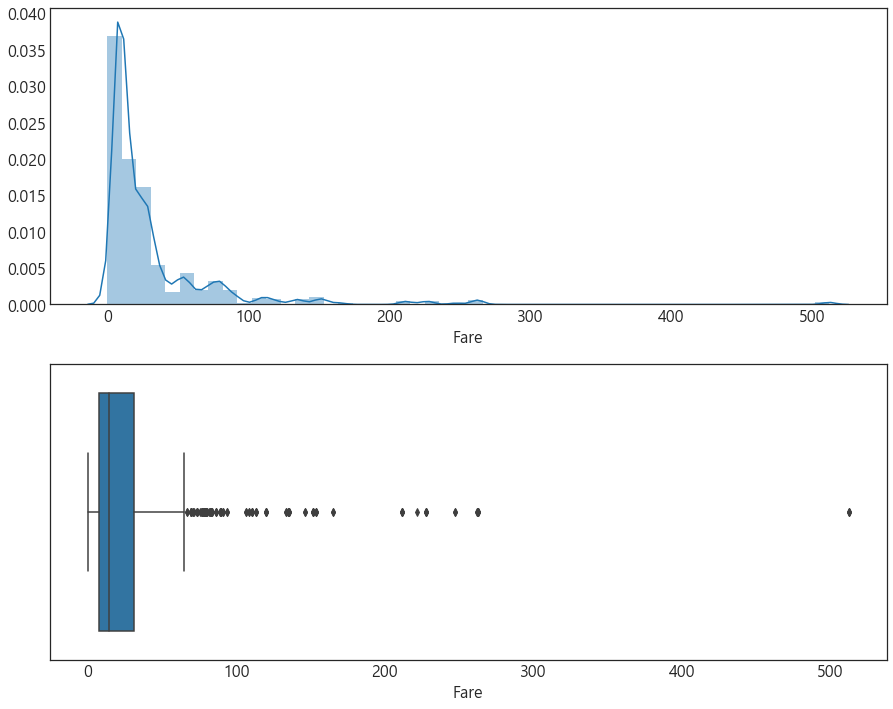

In [33]:
fig = plt.figure(figsize=(15,12))
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)
sns.distplot(tr['Fare'], ax=ax1)
sns.boxplot(x=tr['Fare'], ax=ax2)

C:\Users\ktm\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


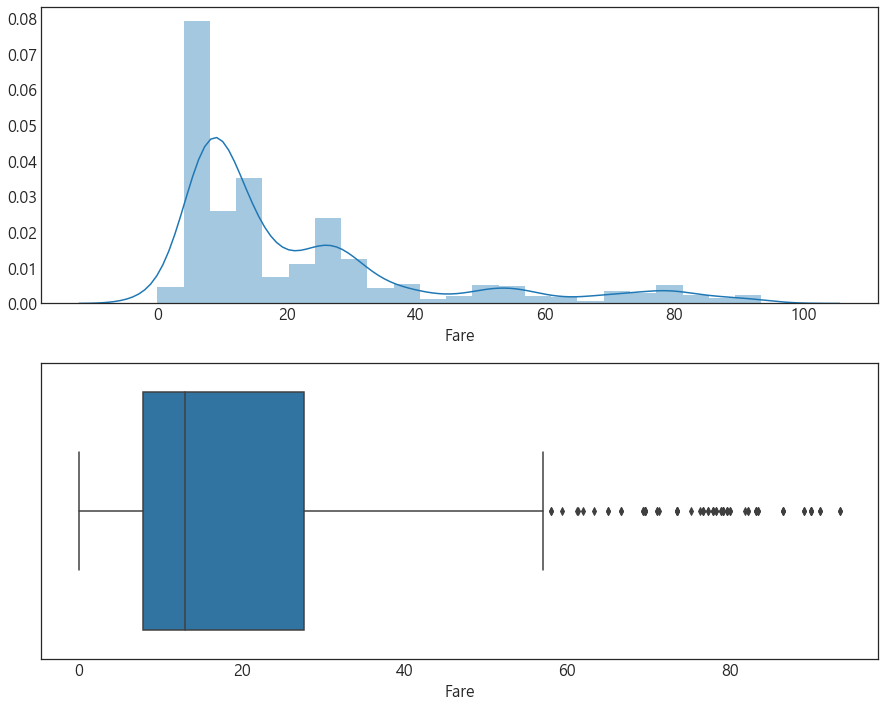

In [38]:
low_fare = tr[tr['Fare']<100]
fig = plt.figure(figsize=(15,12))
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)
sns.distplot(low_fare['Fare'], ax=ax1)
sns.boxplot(x=low_fare['Fare'], ax=ax2)

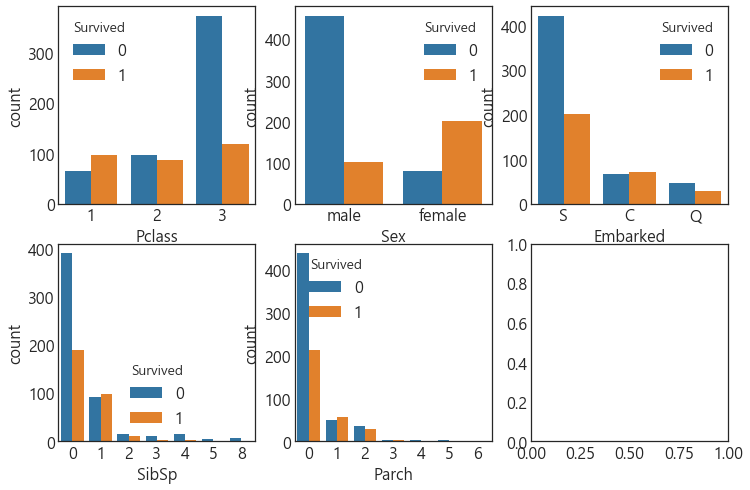

In [40]:
#set_size_inches(x,y)
tr_sub=tr[tr['Fare']<100]
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(12,8)

sns.countplot(data=tr_sub, x='Pclass', hue='Survived', ax=ax1)
sns.countplot(data=tr_sub, x='Sex', hue='Survived', ax=ax2)
sns.countplot(data=tr_sub, x='Embarked', hue='Survived', ax=ax3)
sns.countplot(data=tr_sub, x='SibSp', hue='Survived', ax=ax4)
sns.countplot(data=tr_sub, x='Parch', hue='Survived', ax=ax5)